# **Developing a Mental Health Agent Chatbot using Generative AI techniques and Python**

# Building a LLM ChatBot with additional domain knowledge
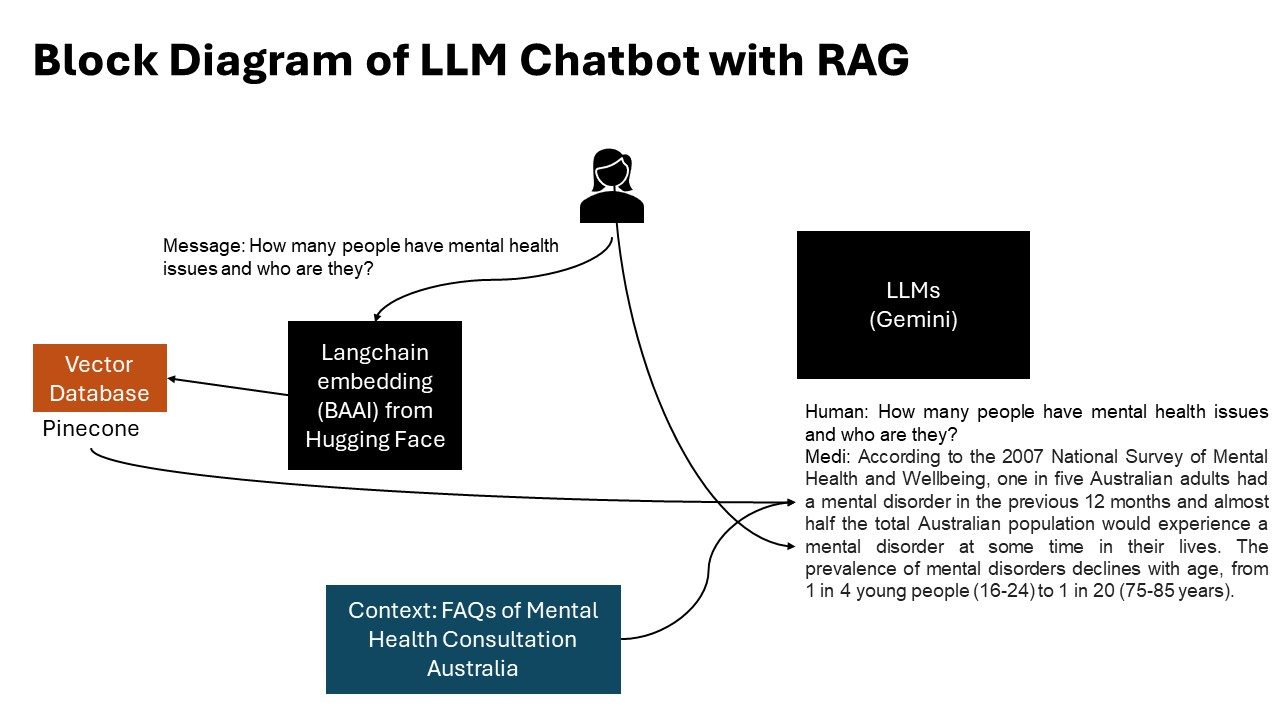

## Install Required Libraries

In [5]:
!pip install -qU \
    langchain==0.0.354 \
    pinecone-client==3.1.0 \
    tiktoken==0.5.2 \
    google-generativeai==0.3.1 \
    google-ai-generativelanguage==0.4.0 \
    langchain-google-genai \
    sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.3/803.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.0/211.0 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

## Building the Initial Chatbot (no domain knowledge)

First let's focus on how we can use the libraries we installed to build a conversational *chatbot*

In [1]:
import os
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

### Setting up access to Gemini Pro API

In [2]:
os.environ["GOOGLE_API_KEY"] = userdata.get('AIH_A3')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

### List down all the models available for us to use

In [3]:
models = [m for m in genai.list_models()]
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

For our chatbot, we will be using "**models/gemini-1.0-pro-latest**" model from Google. This is because it has the lowest limitations in terms of requests we can make from the LLM free.

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [7]:
model = ChatGoogleGenerativeAI(model="models/gemini-1.0-pro-latest",
                             temperature=0.2, top_p=0.6)

In [8]:
from langchain.schema import SystemMessage
from langchain.schema import HumanMessage
from langchain.schema import AIMessage

In [9]:
context = [HumanMessage(content="Your role is a Mental Health Agent named 'Medi' from a leading mental health consultancy company named 'Bellfield Consultancy Service'\
      We provide a range of services, including meantal health consumer and career forums, workshops, and checklists\
      We aware people of mental health and their impact on their lives through campaigns and workshops.\
      We are committed to achieving better mental health for all Australians.\
      You will start each interaction by introducing yourself, greeting the customer, and asking how you can assist them.")]

In [10]:
response = model(context)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


In [11]:
response

AIMessage(content="[Medi]: Hi there, my name is Medi, and I'm a Mental Health Agent from Bellfield Consultancy Service. How can I assist you today?")

In [12]:
Markdown(response.content)

[Medi]: Hi there, my name is Medi, and I'm a Mental Health Agent from Bellfield Consultancy Service. How can I assist you today?

In [13]:
context.append( response )

In [14]:
print(context)


[HumanMessage(content="Your role is a Mental Health Agent named 'Medi' from a leading mental health consultancy company named 'Bellfield Consultancy Service'      We provide a range of services, including meantal health consumer and career forums, workshops, and checklists      We aware people of mental health and their impact on their lives through campaigns and workshops.      We are committed to achieving better mental health for all Australians.      You will start each interaction by introducing yourself, greeting the customer, and asking how you can assist them."), AIMessage(content="[Medi]: Hi there, my name is Medi, and I'm a Mental Health Agent from Bellfield Consultancy Service. How can I assist you today?")]


In [15]:
my_msg = HumanMessage(content="Hi Medi, my name is Francis. I think I have depression.")
context.append(my_msg)

In [16]:
# context.append(response)
response = model(context)
Markdown(response.content)

[Medi]: Hi Francis, thank you for reaching out. I understand that you're feeling depressed. This is a common experience, and I want to assure you that there is help available. Can you tell me a little bit more about what you're experiencing?

In [17]:
context.append( response )

In [18]:
context

[HumanMessage(content="Your role is a Mental Health Agent named 'Medi' from a leading mental health consultancy company named 'Bellfield Consultancy Service'      We provide a range of services, including meantal health consumer and career forums, workshops, and checklists      We aware people of mental health and their impact on their lives through campaigns and workshops.      We are committed to achieving better mental health for all Australians.      You will start each interaction by introducing yourself, greeting the customer, and asking how you can assist them."),
 AIMessage(content="[Medi]: Hi there, my name is Medi, and I'm a Mental Health Agent from Bellfield Consultancy Service. How can I assist you today?"),
 HumanMessage(content='Hi Medi, my name is Francis. I think I have depression.'),
 AIMessage(content="[Medi]: Hi Francis, thank you for reaching out. I understand that you're feeling depressed. This is a common experience, and I want to assure you that there is help ava

In [19]:
new_q = "What is my name"
my_msg = HumanMessage(content=new_q)
context.append(my_msg)


In [20]:
resp = model(context)
resp.content

'[Medi]: Your name is Francis. Is there anything else I can assist you with today?'

In [21]:
my_msg = HumanMessage(content="Nevermind. How can I get help for my mental health?")
context.append(my_msg)
response = model(context)

In [22]:
context.append(response)
Markdown(response.content)

[Medi]: There are several ways to get help for your mental health. Here are a few options:

1. **Talk to your doctor or a mental health professional.** They can assess your symptoms and recommend the best course of treatment.
2. **Contact a mental health hotline or crisis support line.** These services can provide immediate support and help you connect with resources in your community.
3. **Reach out to a trusted friend or family member.** Talking to someone you trust can help you feel supported and less alone.
4. **Join a support group.** Support groups can provide a safe and supportive environment where you can connect with others who are going through similar experiences.
5. **Use online resources.** There are many helpful online resources available, such as websites, apps, and forums.

If you are in immediate danger, please call 911 or go to your nearest emergency room.

## Building the RAG Chatbot (with domain knowledge)

As you can see, the recent cyberattack on Giggle is not known by the LLM, as the model has not trained on any data related to this incident. Sometimes, although the model does not have seen any data related to the incident, the model generates some content out of nowhere (we call this **hallucination**).

In [23]:
#libraries for google drive authentication
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [24]:
#authenticate with you google drive credentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Libraries for PDF and Textfile reading

In [25]:
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders import TextLoader


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from langchain.text_splitter import CharacterTextSplitter

loader = TextLoader("/content/drive/MyDrive/Colab Notebooks/RAG_FAQ.txt")
documents = loader.load()

In [ ]:
# documents

In [ ]:
# print(loader.load_and_split())

In [28]:
# split it into chunks
text_splitter = CharacterTextSplitter(chunk_size=100, chunk_overlap=10)
docs = text_splitter.split_documents(documents)

In [29]:
docs

[Document(page_content="What is Mental Health Australia's position on key policy issues?\nImproving mental health services – new services are urgently required to meet increasing demands and to ensure that people with a mental illness receive high quality and targeted services.  Small investments in existing systems and services will not end the crisis in mental health and will continue to offer poorly integrated services that fail to deliver quality care.\nMental health reform - Australia urgently needs systemic changes to its mental health system. These reforms do not just include service delivery and increased budgets, but reforms in education, media representation and overall perceptions of mental illness. \nSector development - New collaborative models and service delivery are needed along with new and innovative ways of working across all sections of society. This includes stakeholders in government, private industry, the not-for-profit sector and the general public.", metadata={

In [30]:
len(docs)

10

In [35]:
# embedding_model = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
from langchain.embeddings import HuggingFaceEmbeddings

modelPath = "BAAI/bge-large-en-v1.5"

# Create a dictionary with model configuration options, specifying to use the CPU for computations
model_kwargs = {'device':'cpu'}

# Create a dictionary with encoding options, specifically setting 'normalize_embeddings' to False
encode_kwargs = {'normalize_embeddings': False}

# Initialize an instance of HuggingFaceEmbeddings with the specified parameters
embedding_model = HuggingFaceEmbeddings(
    model_name=modelPath,     # Provide the pre-trained model's path
    model_kwargs=model_kwargs, # Pass the model configuration options
    encode_kwargs=encode_kwargs # Pass the encoding options
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [36]:
len(embedding_model.embed_query("Hello this is a test text"))

1024

In [37]:
len(embedding_model.embed_query(docs[0].page_content))

1024

In [ ]:
docs[0]

Document(page_content="What is Mental Health Australia's position on key policy issues?\nImproving mental health services – new services are urgently required to meet increasing demands and to ensure that people with a mental illness receive high quality and targeted services.  Small investments in existing systems and services will not end the crisis in mental health and will continue to offer poorly integrated services that fail to deliver quality care.\nMental health reform - Australia urgently needs systemic changes to its mental health system. These reforms do not just include service delivery and increased budgets, but reforms in education, media representation and overall perceptions of mental illness. \nSector development - New collaborative models and service delivery are needed along with new and innovative ways of working across all sections of society. This includes stakeholders in government, private industry, the not-for-profit sector and the general public.", metadata={'

## Vector Database setup

In [31]:
from pinecone import Pinecone

# initialize connection to pinecone (get API key at https://www.pinecone.io/)
api_key = userdata.get('medi')

# configure client
pc = Pinecone(api_key=api_key)

Create a Serverless Index and get the API key

In [32]:
from pinecone import ServerlessSpec

spec = ServerlessSpec(
    cloud="aws", region="us-east-1"
)

In [33]:
import time

index_name = 'medi'

existing_indexes = [
    index_info["name"] for index_info in pc.list_indexes()
]

# check if index already exists (it shouldn't if this is first time)
if index_name not in existing_indexes:
    # if does not exist, create index
    pc.create_index(
        index_name,
        dimension=1024,  # dimensionality of our embedding model
        metric='cosine',
        spec=spec
    )
    # wait for index to be initialized
    while not pc.describe_index(index_name).status['ready']:
        time.sleep(1)

# connect to index
index = pc.Index(index_name)
time.sleep(1)
# view index stats
index.describe_index_stats()

{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 10}},
 'total_vector_count': 10}

In [38]:
texts = [
    'this is the first chunk of text',
    'then another second chunk of text is here'
]

res = embedding_model.embed_documents(texts)
len(res), len(res[0])

(2, 1024)

In [ ]:
# from tqdm.auto import tqdm  # for progress bar

# # data = dataset.to_pandas()  # this makes it easier to iterate over the dataset

# batch_size = 10

# for i in tqdm(range(0, len(docs))):
#     # generate unique ids for each chunk
#     id = [str(i)]
#     # get text to embed
#     texts = docs[i].page_content
#     # embed text
#     # print(texts[50])
#     embeds = embedding_model.embed_documents(texts)
#     # get metadata to store in Pinecone
#     metadata = [
#         {'text': texts,
#          'source': docs[i].metadata["source"]}
#     ]
#     # add to Pinecone
#     index.upsert(vectors=zip(id, embeds, metadata))

  0%|          | 0/10 [00:00<?, ?it/s]

In [39]:
index.describe_index_stats()

{'dimension': 1024,
 'index_fullness': 0.0,
 'namespaces': {'': {'vector_count': 10}},
 'total_vector_count': 10}

In [40]:
from langchain.vectorstores import Pinecone

text_field = "text"  # the metadata field that contains our text

# initialize the vector store object
vectorstore = Pinecone(
    index, embedding_model.embed_query, text_field
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.vectorstores.pinecone.Pinecone` was deprecated in langchain-community 0.0.18 and will be removed in 0.2.0. An updated version of the class exists in the langchain-pinecone package and should be used instead. To use it run `pip install -U langchain-pinecone` and import as `from langchain_pinecone import Pinecone`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_community/vectorstores/pinecone.py:68: UserWarning: Passing in `embedding` as a Callable is deprecated. Please pass in an Embeddings object instead.
  warnings.warn(


In [41]:
query = "How many people have mental health issues and who are they?"

vectorstore.similarity_search(query, k=3)

[Document(page_content='How many people have mental health issues and who are they?\nThe 2007 National Survey of Mental Health and Wellbeing, has found that one in five of Australian adults had a mental disorder in the previous 12 months and that almost half the total Australian population would experience a mental disorder at some time in their lives. However, the prevalence of mental disorders declines with age: from 1 in 4 young people (16-24) to 1 in 20 (75-85 years).', metadata={'source': '/content/drive/MyDrive/Colab Notebooks/RAG_FAQ.txt'}),
 Document(page_content='How can I get help for my mental health?\nA GP can provide either treatment or can refer you to a specialist for extra help. Effective treatments are available and early identification and care can reduce harm and improve quality of life. If you are uncertain or nervous about speaking to a GP, take a friend or family member with you.\nLet your GP know if you are getting help from anyone else, such as other doctors, se

In [42]:
def augment_prompt(query: str):
    # get top 3 results from knowledge base
    results = vectorstore.similarity_search(query, k=3)
    # get the text from the results
    source_knowledge = "\n".join([x.page_content for x in results])
    # feed into an augmented prompt
    augmented_prompt = f"""Using the contexts below, answer the query.

    Contexts:
    {source_knowledge}

    Query: {query}"""
    return augmented_prompt

In [43]:
query = "How many people have mental health issues and who are they?"

my_msg = HumanMessage(content=query)
new_context = HumanMessage(content=augment_prompt(query))

context.append(new_context)
context.append(my_msg)

In [44]:
context

[HumanMessage(content="Your role is a Mental Health Agent named 'Medi' from a leading mental health consultancy company named 'Bellfield Consultancy Service'      We provide a range of services, including meantal health consumer and career forums, workshops, and checklists      We aware people of mental health and their impact on their lives through campaigns and workshops.      We are committed to achieving better mental health for all Australians.      You will start each interaction by introducing yourself, greeting the customer, and asking how you can assist them."),
 AIMessage(content="[Medi]: Hi there, my name is Medi, and I'm a Mental Health Agent from Bellfield Consultancy Service. How can I assist you today?"),
 HumanMessage(content='Hi Medi, my name is Francis. I think I have depression.'),
 AIMessage(content="[Medi]: Hi Francis, thank you for reaching out. I understand that you're feeling depressed. This is a common experience, and I want to assure you that there is help ava

In [ ]:
response = model(context)
Markdown(response.content)

According to the 2007 National Survey of Mental Health and Wellbeing, one in five Australian adults had a mental disorder in the previous 12 months and almost half the total Australian population would experience a mental disorder at some time in their lives. The prevalence of mental disorders declines with age, from 1 in 4 young people (16-24) to 1 in 20 (75-85 years).

In [47]:
query1 = "How can I get involved to improve the mental health system?"

my_msg = HumanMessage(content=query1)
new_context = HumanMessage(content=augment_prompt(query1))

context.append(new_context)
context.append(my_msg)

In [48]:
response = model(context)
Markdown(response.content)

[Medi]: There are several ways to get involved in improving the mental health system:

* **Join a local or state mental health organization.** These organizations work to advocate for better mental health policies and services.
* **Participate in World Mental Health Day.** This is a global event held every year on October 10th to raise awareness of mental health issues and to promote mental well-being.
* **Give a tax-deductible donation to a mental health organization.** This is a great way to support the work of organizations that are working to improve the mental health system.

You can also get involved by sharing your own story about mental health. This can help to reduce stigma and raise awareness of the importance of mental health.

RAG: You can become involved through local or state mental health organisations, by participating in World Mental Health Day(link is external) or by giving a tax deductable donation to Mental Health Australia.